In [346]:
# Search Term
search_artist = input("Which artist would you like to search for? ")

Which artist would you like to search for? Taylor Swift


In [347]:
search_song = input("Which song would you like to search for? ")

Which song would you like to search for? Look What You Made Me Do


In [348]:
import pandas as pd
import lyricwikia
import pprint

songlist = [search_song]


artist = search_artist
songlyric_master = []
songs = []


for song in songlist:
   lyrics = lyricwikia.get_lyrics(search_artist, search_song)
   songlyric_master.append(lyrics)
   songs.append(search_song)


dicto = dict(zip(songs, songlyric_master))

lyrics_dict = dict(artist = artist,
                  song_lyrics = dicto)

pprint.pprint(lyrics_dict)

{'artist': 'Taylor Swift',
 'song_lyrics': {'Look What You Made Me Do': "I don't like your little games\n"
                                             "Don't like your tilted stage\n"
                                             'The role you made me play\n'
                                             "Of the fool, no, I don't like "
                                             'you\n'
                                             '\n'
                                             "I don't like your perfect crime\n"
                                             'How you laugh when you lie\n'
                                             'You said the gun was mine\n'
                                             "Isn't cool, no, I don't like you "
                                             '(oh)\n'
                                             '\n'
                                             'But I got smarter, I got harder '
                                             'in the nick of t

In [349]:
pprint.pprint(lyrics_dict['song_lyrics'][search_song])

("I don't like your little games\n"
 "Don't like your tilted stage\n"
 'The role you made me play\n'
 "Of the fool, no, I don't like you\n"
 '\n'
 "I don't like your perfect crime\n"
 'How you laugh when you lie\n'
 'You said the gun was mine\n'
 "Isn't cool, no, I don't like you (oh)\n"
 '\n'
 'But I got smarter, I got harder in the nick of time\n'
 'Honey, I rose up from the dead, I do it all the time\n'
 "I've got a list of names and yours is in red, underlined\n"
 'I check it once, then I check it twice, oh\n'
 '\n'
 'Ooh, look what you made me do\n'
 'Look what you made me do\n'
 'Look what you just made me do\n'
 'Look what you just made me\n'
 '\n'
 'Ooh, look what you made me do\n'
 'Look what you made me do\n'
 'Look what you just made me do\n'
 'Look what you just made me do\n'
 '\n'
 "I don't like your kingdom keys\n"
 'They once belonged to me\n'
 'You ask me for a place to sleep\n'
 'Locked me out and threw a feast (what?)\n'
 '\n'
 'The world moves on, another day, anothe

In [350]:
text = lyrics_dict['song_lyrics'][search_song]

In [351]:
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Run Vader Analysis on each tweet
results = analyzer.polarity_scores(text)
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]

print(f"Compound: {compound:.3f}")
print(f"Positive: {pos:.3f}")
print(f"Neutral: {neu:.3f}")
print(f"Negative: {neg:.3f}")

Compound: -0.954
Positive: 0.075
Neutral: 0.810
Negative: 0.116


In [352]:
x = ((-(neg)) + pos)
if x < -0.1:
    arrow = 1
elif -0.1 < x < -0.02:
    arrow = 2
elif -0.02 < x < 0.02:
    arrow = 3
elif 0.02 < x < 0.1:
    arrow = 4
elif 0.1 < x:
    arrow = 5

In [353]:
%matplotlib inline

In [354]:
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np

In [355]:
from matplotlib.patches import Circle, Wedge, Rectangle

In [356]:
def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

In [357]:
def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [358]:
def gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=12, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

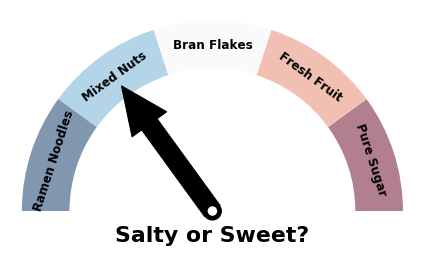

In [359]:
gauge(labels=['Ramen Noodles','Mixed Nuts','Bran Flakes', 'Fresh Fruit','Pure Sugar'], \
      colors='RdBu', arrow=arrow, title='Salty or Sweet?') 
